# Group Assignment - Big Data for Decision Making

## group number-7
## Candidate number:
1) 344023
| 2) 454712
| 3) 525976
| 4) 379597

In [1]:
# from IPython.display import Image

# # Specify the image file path
# image_path = 'C:\\Users\\Rohit Dasari\\OneDrive\\Pictures\\Priya.jpg'

# # Display the image
# Image(filename=image_path)

## Contents:

1. Introduction 
2. Importing Libraries
3. Data Preparation
4. Descriptive Statistics
5. Checking Missing Values
5. Data Visualization 
6. Standardization 
7. Train-Test split


# Introduction:
Company Name- Street Safe Solutions

Problem Statement- A car insurance company wants to assess severity of accidents the driver applying for an insurance is likely to be involved in

Business Objective: The objective of Street Safe Solutions is to assess the severity of accidents that drivers applying for insurance are likely to be involved in.

Context: Street Safe Solutions is a car insurance provider focused on evaluating and forecasting the extent of accident severity for potential policyholders. Through a comprehensive understanding of each driver's associated risk, the company customizes insurance policies, premiums, and coverage to minimize losses and effectively manage risks. By accurately assessing accident severity, Street Safe Solutions makes informed determinations regarding insurance approvals, policy terms, and pricing, resulting in improved customer safety and satisfaction.


# Importing Libraries

In [2]:
#importing python libraries into jupyter notebook.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification

# Data Preparation

## Loading the data

The casualty data from the CSV file is loaded into a DataFrame variable called “df”, which can be used for further analysis

In [3]:
# Loading the casualty data into the dataframe called 'df'
df=pd.read_csv("C:\\Users\\220288633\\OneDrive - Aston University\\Big data\\Coursework\\dft-road-casualty-statistics-casualty-2021.csv")

C:\ProgramData\Anaconda3_2020\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Writing ‘df’ in subsequent code refers to the DataFrame object created by reading the specified CSV file. It allows us to access the data within the DataFrame and displays the output as the columns and rows. 

In [4]:
#calling out the dataframe.
df

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,2021010287148,2021,10287148,1,1,1,1,19,4,3,0,0,0,0,0,9,1,10,E01023551
1,2021010287149,2021,10287149,1,1,2,1,25,5,3,0,0,1,0,0,9,1,5,E01003955
2,2021010287149,2021,10287149,2,2,1,1,21,5,3,0,0,0,0,0,9,1,3,E01004202
3,2021010287149,2021,10287149,2,3,2,1,17,4,2,0,0,1,0,0,9,1,2,E01004295
4,2021010287151,2021,10287151,1,1,1,1,27,6,3,0,0,0,0,0,9,1,2,E01002056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128204,2021991196607,2021,991196607,1,1,1,1,38,7,3,0,0,0,0,0,9,2,5,-1
128205,2021991196607,2021,991196607,2,2,1,1,61,9,3,0,0,0,0,0,9,2,9,-1
128206,2021991197944,2021,991197944,1,1,2,2,11,3,3,0,0,2,0,0,9,3,5,-1
128207,2021991200639,2021,991200639,1,1,3,2,34,6,3,1,3,0,0,0,0,1,1,-1


Creating another DataFrame called ‘Imp_colm’ that includes only specific columns named "accident_index" and "accident_reference" from the DataFrame ‘df’. This allows us to work with a subset of the original data, focusing on the columns of interest for further analysis or processing.

In [5]:
#These are the common columns in the three datasets taken into study
Imp_colm=df[["accident_index","accident_reference"]]

In [6]:
#calling out the imp_colm variable.
Imp_colm

,accident_index,accident_reference
0,2021010287148,10287148
1,2021010287149,10287149
2,2021010287149,10287149
3,2021010287149,10287149
4,2021010287151,10287151
...,...,...
128204,2021991196607,991196607
128205,2021991196607,991196607
128206,2021991197944,991197944
128207,2021991200639,991200639


The vehicle data from the CSV file is loaded into a DataFrame called ‘df1’ which can be used for further analysis.

In [7]:
# loading the vehicles data into the dataframe 'df1'
df1=pd.read_csv("C:\\Users\\220288633\\OneDrive - Aston University\\Big data\\Coursework\\dft-road-casualty-statistics-vehicle-2021.csv")

C:\ProgramData\Anaconda3_2020\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Writing ‘df1’ in subsequent code refers to the DataFrame object created by reading the specified CSV file. It allows us to access the data within the DataFrame and displays the output as the columns and rows. 

In [8]:
#calling out the 'df1' variable.
df1

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2021010287148,2021,10287148,1,9,0,17,1,5,0,...,1,19,4,999,1,3,VOLKSWAGEN GOLF,10,1,E01023551
1,2021010287148,2021,10287148,2,9,0,2,0,0,0,...,3,-1,-1,1499,1,2,BMW 1 SERIES,-1,-1,-1
2,2021010287148,2021,10287148,3,9,0,2,0,0,0,...,3,-1,-1,-1,3,1,SMART FORTWO,-1,-1,-1
3,2021010287149,2021,10287149,1,9,0,18,3,7,0,...,1,32,6,2967,2,11,AUDI Q7,-1,-1,-1
4,2021010287149,2021,10287149,2,9,0,18,5,1,0,...,1,21,5,1598,1,11,VAUXHALL ASTRA,3,1,E01004202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186438,2021991196607,2021,991196607,2,9,0,18,1,5,0,...,1,61,9,-1,-1,-1,-1,9,2,-1
186439,2021991197944,2021,991197944,1,9,0,18,3,7,0,...,2,51,8,-1,-1,-1,-1,5,3,-1
186440,2021991200639,2021,991200639,1,9,0,18,4,8,0,...,2,24,5,-1,-1,-1,-1,4,1,-1
186441,2021991201030,2021,991201030,1,9,0,18,2,6,0,...,1,28,6,-1,-1,-1,-1,5,2,-1


The accident data from the CSV file is loaded into a DataFrame called ‘df2’ which can be used for further analysis.

In [9]:
# loading the vehicles data into the dataframe 'df2'
df2=pd.read_csv("C:\\Users\\220288633\\OneDrive - Aston University\\Big data\\Coursework\\dft-road-casualty-statistics-accident-2021.csv")

C:\ProgramData\Anaconda3_2020\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,2,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Writing ‘df2’ in subsequent code refers to the DataFrame object created by reading the specified CSV file. It allows us to access the data within the DataFrame and displays the output as the columns and rows. 

In [10]:
#calling out the 'df2' variable.
df2

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2021010287148,2021,10287148,521508.0,193079.0,-0.246102,51.623425,1,3,3,...,0,4,7,4,1,0,1,1,2,E01000263
1,2021010287149,2021,10287149,535379.0,180783.0,-0.050574,51.509767,1,2,2,...,5,4,1,1,0,0,1,1,2,E01004303
2,2021010287151,2021,10287151,529701.0,170398.0,-0.136152,51.417769,1,2,2,...,5,4,1,1,0,0,1,1,2,E01003146
3,2021010287155,2021,10287155,525312.0,178385.0,-0.196411,51.490536,1,1,1,...,4,4,1,1,0,0,1,1,2,E01002847
4,2021010287157,2021,10287157,512144.0,171526.0,-0.388169,51.431649,1,3,4,...,0,4,1,1,0,0,1,1,2,E01002608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101082,2021991196247,2021,991196247,325546.0,674548.0,-3.194076,55.958152,99,3,2,...,0,1,1,1,0,0,1,1,-1,-1
101083,2021991196607,2021,991196607,271195.0,558271.0,-4.010304,54.902512,99,3,2,...,0,6,1,1,0,0,2,1,-1,-1
101084,2021991197944,2021,991197944,357297.0,860768.0,-2.716825,57.634805,99,3,1,...,0,1,1,1,0,0,2,1,-1,-1
101085,2021991200639,2021,991200639,326936.0,675925.0,-3.172192,55.970735,99,3,1,...,5,1,9,1,0,0,1,2,-1,-1


### Merging DataFrames:

Merging 2 DataFrames, ‘df1’ and ‘df2’ based on a common column named ‘accident_index’. This merge is performed using an inner join which means that only the rows with the matching values in the ‘accident_index’ column will be included in the resulting merged DataFrame, ‘merged_df’.  


In [11]:
#merging the dataframes df1 and df2 withe respect to the common column named 'accident_index' and loading 
#the merged data into the variable 'merged_df'.
merged_df = pd.merge(df1, df2, on='accident_index', how='inner')

Calling the ‘merged_df’ code, displays the data available in that DataFrame.

In [12]:
#calling out the dataframe 'merged_df'
merged_df

,accident_index,accident_year_x,accident_reference_x,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2021010287148,2021,10287148,1,9,0,17,1,5,0,...,0,4,7,4,1,0,1,1,2,E01000263
1,2021010287148,2021,10287148,2,9,0,2,0,0,0,...,0,4,7,4,1,0,1,1,2,E01000263
2,2021010287148,2021,10287148,3,9,0,2,0,0,0,...,0,4,7,4,1,0,1,1,2,E01000263
3,2021010287149,2021,10287149,1,9,0,18,3,7,0,...,5,4,1,1,0,0,1,1,2,E01004303
4,2021010287149,2021,10287149,2,9,0,18,5,1,0,...,5,4,1,1,0,0,1,1,2,E01004303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157141,2021991047985,2021,991047985,1,9,0,5,7,3,0,...,0,1,1,1,0,0,1,1,-1,-1
157142,2021991047985,2021,991047985,2,9,0,5,5,1,0,...,0,1,1,1,0,0,1,1,-1,-1
157143,2021991048010,2021,991048010,1,9,0,18,7,3,0,...,0,1,1,1,0,0,1,1,-1,-1
157144,2021991048010,2021,991048010,2,9,0,2,0,0,0,...,0,1,1,1,0,0,1,1,-1,-1


Merging 2 DataFrames, ‘merged_df’ and ‘df’ based on a common column named ‘accident_index’. This merge is performed using an inner join which means that only the rows with the matching values in the ‘accident_index’ column will be included in the resulting merged DataFrame, ‘merged_df1’.  

In [13]:
#merging the dataframes merged_df and df withe respect to the common column named 'accident_index' and loading 
#the merged data into the variable 'merged_df1'.
merged_df1 = pd.merge(merged_df, df, on='accident_index', how='inner')

Calling the ‘merged_df1’ code, displays the data available in that DataFrame. 

In [14]:
#calling out the dataframe 'merged_df1'
merged_df1

,accident_index,accident_year_x,accident_reference_x,vehicle_reference_x,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,2021010287148,2021,10287148,1,9,0,17,1,5,0,...,3,0,0,0,0,0,9,1,10,E01023551
1,2021010287148,2021,10287148,2,9,0,2,0,0,0,...,3,0,0,0,0,0,9,1,10,E01023551
2,2021010287148,2021,10287148,3,9,0,2,0,0,0,...,3,0,0,0,0,0,9,1,10,E01023551
3,2021010287149,2021,10287149,1,9,0,18,3,7,0,...,3,0,0,1,0,0,9,1,5,E01003955
4,2021010287149,2021,10287149,1,9,0,18,3,7,0,...,3,0,0,0,0,0,9,1,3,E01004202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155452,2021991047985,2021,991047985,2,9,0,5,5,1,0,...,3,0,0,1,0,0,9,1,2,-1
155453,2021991047985,2021,991047985,2,9,0,5,5,1,0,...,3,0,0,2,0,0,9,1,4,-1
155454,2021991048010,2021,991048010,1,9,0,18,7,3,0,...,2,9,9,0,0,0,0,1,5,-1
155455,2021991048010,2021,991048010,2,9,0,2,0,0,0,...,2,9,9,0,0,0,0,1,5,-1


Checking for Missing Values in the DataFrame, ‘merged_df1’ and the result displays the count of null values for each column.

In [15]:
#checking the missing values in the dataframe'merged_df1'.
merged_df1.isnull().sum()

accident_index                        0
accident_year_x                       0
accident_reference_x                  0
vehicle_reference_x                   0
vehicle_type                          0
                                     ..
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
lsoa_of_casualty                      0
Length: 81, dtype: int64

Selecting finalised columns from the DataFrame, ‘merged_df1’ and assigning them to a new DataFrame called, ‘final_variable’.

In [16]:
#Selecting specific columns and assigning them to the dataframe 'final_variable'.
final_variable=merged_df1[["accident_index","accident_severity","number_of_vehicles", "number_of_casualties","date", "day_of_week","time","local_authority_highway","road_type","speed_limit","age_of_driver","junction_control","driver_home_area_type","pedestrian_crossing_physical_facilities","light_conditions","weather_conditions","road_surface_conditions","vehicle_type","vehicle_manoeuvre","vehicle_location_restricted_lane","sex_of_driver","propulsion_code","casualty_class","casualty_type"]]


Removing duplicates rows from the DataFrame, ‘final_variable’ and returning a new DataFrame with unique rows based on all columns.

In [17]:
#dropping the duplicates from the dataset and displaying the accident_index column
final_variable['accident_index'].drop_duplicates()

0         2021010287148
3         2021010287149
9         2021010287151
17        2021010287155
18        2021010287157
              ...      
155448    2021991047937
155449    2021991047981
155450    2021991047985
155454    2021991048010
155456    2021991048011
Name: accident_index, Length: 64018, dtype: object

Filtering the DataFrame, ‘final_variable’ by removing rows that contains the value ‘-1’ and dropping any rows that have missing values (NaN) across any column. The result displays DataFrame, ‘final_variable’ including rows that satisfy both the conditions.

In [18]:
#removing-1 from the data
final_variable=final_variable[final_variable!=-1].dropna()
#displaying the result
final_variable

,accident_index,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_highway,road_type,speed_limit,...,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,vehicle_manoeuvre,vehicle_location_restricted_lane,sex_of_driver,propulsion_code,casualty_class,casualty_type
0,2021010287148,3,3,1,01/01/2021,6,02:05,E09000003,6,30,...,4.0,7.0,4.0,9.0,17.0,0.0,1.0,1.0,1,9
6,2021010287149,2,2,3,01/01/2021,6,03:30,E09000030,3,30,...,4.0,1.0,1.0,9.0,18.0,0.0,1.0,1.0,2,9
7,2021010287149,2,2,3,01/01/2021,6,03:30,E09000030,3,30,...,4.0,1.0,1.0,9.0,18.0,0.0,1.0,1.0,1,9
8,2021010287149,2,2,3,01/01/2021,6,03:30,E09000030,3,30,...,4.0,1.0,1.0,9.0,18.0,0.0,1.0,1.0,2,9
9,2021010287151,2,2,4,01/01/2021,6,04:07,E09000022,6,30,...,4.0,1.0,1.0,9.0,6.0,0.0,1.0,8.0,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155441,2021991047889,3,2,1,22/05/2021,7,08:35,S12000017,6,60,...,1.0,1.0,1.0,9.0,10.0,0.0,1.0,2.0,1,9
155450,2021991047985,3,2,2,22/05/2021,7,21:00,S12000043,6,30,...,1.0,1.0,1.0,9.0,5.0,0.0,1.0,8.0,2,9
155451,2021991047985,3,2,2,22/05/2021,7,21:00,S12000043,6,30,...,1.0,1.0,1.0,9.0,5.0,0.0,1.0,8.0,2,9
155452,2021991047985,3,2,2,22/05/2021,7,21:00,S12000043,6,30,...,1.0,1.0,1.0,9.0,5.0,0.0,1.0,2.0,2,9


Selecting random 10,000 rows and assigning it to a new DataFrame called ‘final_data’.

In [19]:
#taking random 10000 rows from the dataset and feeding it to dataframe 'final_data'
final_data=final_variable.sample(n = 10000)

Calling the final_data code to display the data available in the dataframe.

In [20]:
#displaying the results
final_data

,accident_index,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_highway,road_type,speed_limit,...,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,vehicle_manoeuvre,vehicle_location_restricted_lane,sex_of_driver,propulsion_code,casualty_class,casualty_type
131762,2021520103818,3,4,1,17/05/2021,2,12:30,E10000027,6,50,...,1.0,1.0,1.0,9.0,18.0,0.0,2.0,1.0,1,9
25005,2021010319400,3,2,1,16/07/2021,6,19:00,E09000020,1,30,...,1.0,1.0,1.0,9.0,3.0,0.0,1.0,1.0,1,9
40265,2021061064926,3,3,3,10/07/2021,7,14:05,E08000008,3,40,...,1.0,1.0,1.0,9.0,18.0,0.0,1.0,1.0,2,9
100473,2021302100283,3,2,2,10/03/2021,4,10:20,E10000007,6,40,...,1.0,1.0,2.0,9.0,9.0,0.0,1.0,1.0,1,9
81906,2021201063182,3,2,5,25/02/2021,5,22:44,E08000031,6,30,...,4.0,1.0,1.0,9.0,18.0,0.0,2.0,2.0,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144369,2021552101412,3,2,1,29/12/2021,4,18:47,E06000029,3,40,...,4.0,1.0,1.0,9.0,3.0,0.0,1.0,1.0,1,9
115952,202134NNC3601,3,2,1,25/09/2021,7,16:10,E10000021,6,60,...,1.0,1.0,1.0,9.0,9.0,0.0,1.0,2.0,1,9
73728,2021161031930,3,2,1,30/03/2021,3,14:30,E06000010,6,30,...,1.0,1.0,1.0,9.0,18.0,0.0,1.0,1.0,1,9
128914,2021401055962,2,1,2,09/06/2021,4,20:10,E06000056,1,30,...,1.0,1.0,1.0,4.0,9.0,0.0,1.0,1.0,1,4


Returning the number of rows and columns from the dataframe final_data.

In [21]:
#executing the shape command to get the number of rows and columns
final_data.shape

(10000, 24)

The column command is used to get the names of the columns in the dataset.

In [22]:
#calling out the column names in the dataset.
final_data.columns

Index(['accident_index', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_highway', 'road_type', 'speed_limit', 'age_of_driver',
       'junction_control', 'driver_home_area_type',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'vehicle_type',
       'vehicle_manoeuvre', 'vehicle_location_restricted_lane',
       'sex_of_driver', 'propulsion_code', 'casualty_class', 'casualty_type'],
      dtype='object')

In [23]:
columns_to_convert = ['age_of_driver','driver_home_area_type', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'vehicle_type', 'vehicle_manoeuvre', 'vehicle_location_restricted_lane', 'sex_of_driver']

for col in columns_to_convert:
    final_data[col] = final_data[col].astype(int)

Returning information like the datatype, non-null values, and the memory usage of the dataframe

In [24]:
# calling out the info() command
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 131762 to 15880
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   accident_index                           10000 non-null  object 
 1   accident_severity                        10000 non-null  int64  
 2   number_of_vehicles                       10000 non-null  int64  
 3   number_of_casualties                     10000 non-null  int64  
 4   date                                     10000 non-null  object 
 5   day_of_week                              10000 non-null  int64  
 6   time                                     10000 non-null  object 
 7   local_authority_highway                  10000 non-null  object 
 8   road_type                                10000 non-null  int64  
 9   speed_limit                              10000 non-null  int64  
 10  age_of_driver                            

# Descriptive Statistics

Genearating the descriptive statistics for all the columns available in the dataframe.

In [25]:
#.describe() code is used for getting the descriptive statistics of the data.
final_data.describe(include="all")

,accident_index,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_highway,road_type,speed_limit,...,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,vehicle_manoeuvre,vehicle_location_restricted_lane,sex_of_driver,propulsion_code,casualty_class,casualty_type
count,10000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000,10000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
unique,8281,NaN,NaN,NaN,365,NaN,1215,156,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2021101117442,NaN,NaN,NaN,20/07/2021,NaN,17:30,E08000025,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,12,NaN,NaN,NaN,59,NaN,88,403,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.795300,2.105500,1.757300,NaN,4.147700,NaN,NaN,5.174100,34.220000,...,1.836600,1.560300,1.321400,9.096200,18.957600,7.567700,1.346400,1.77590,1.346900,7.431900
std,NaN,0.429903,0.682654,1.135485,NaN,1.945164,NaN,NaN,1.797641,12.167432,...,1.523132,1.681442,0.836404,3.423495,23.579601,26.126639,0.505601,1.55078,0.600497,6.100531
min,NaN,1.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,1.000000,20.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.00000,1.000000,0.000000
25%,NaN,3.000000,2.000000,1.000000,NaN,3.000000,NaN,NaN,6.000000,30.000000,...,1.000000,1.000000,1.000000,9.000000,8.000000,0.000000,1.000000,1.00000,1.000000,3.000000
50%,NaN,3.000000,2.000000,1.000000,NaN,4.000000,NaN,NaN,6.000000,30.000000,...,1.000000,1.000000,1.000000,9.000000,17.000000,0.000000,1.000000,1.00000,1.000000,9.000000
75%,NaN,3.000000,2.000000,2.000000,NaN,6.000000,NaN,NaN,6.000000,40.000000,...,1.000000,1.000000,1.000000,9.000000,18.000000,0.000000,2.000000,2.00000,2.000000,9.000000


Removing the duplicates from the dataset with respect to the column name 'accident_index'.

In [26]:
## Assuming you have a DataFrame final_data and a column named 'column_name'
duplicates = final_data.duplicated(subset='accident_index', keep='first')

# Print the duplicate values
print(final_data[duplicates]['accident_index'])

# Remove the duplicate values
final_data = final_data[~duplicates]

88564     2021201131912
65638     2021131118964
74549     2021161052370
125965    2021371060475
55380     2021122100422
              ...      
128662    2021401045911
30825     2021010327628
81116     2021201054245
75067     2021161068230
144369    2021552101412
Name: accident_index, Length: 1719, dtype: object


Returning the number of rows and columns from the dataframe final_data.

In [27]:
#executing the shape command to get the number of rows and columns
final_data.shape

(8281, 24)

Generating correlations among the variables available in the DataFrame.

In [28]:
#.corr() code is used to get the correlation matrix of the data.
final_data.corr()

,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,road_type,speed_limit,age_of_driver,junction_control,driver_home_area_type,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,vehicle_manoeuvre,vehicle_location_restricted_lane,sex_of_driver,propulsion_code,casualty_class,casualty_type
accident_severity,1.000000,0.033224,-0.096094,0.009230,-0.016839,-0.102433,-0.022017,0.010583,-0.066354,0.074870,-0.060280,0.024132,0.030121,0.011819,0.107893,0.126746,0.068976,0.026513,-0.085996,0.050350
number_of_vehicles,0.033224,1.000000,0.195876,-0.008423,0.009312,0.088794,0.008951,-0.016385,0.029427,-0.053582,-0.025805,-0.043797,-0.022335,0.063378,-0.052087,-0.040547,0.027742,-0.020150,-0.350475,0.182333
number_of_casualties,-0.096094,0.195876,1.000000,-0.004303,0.020676,0.172955,-0.023114,-0.052671,0.056012,-0.048360,0.044464,-0.038454,-0.012545,0.072226,-0.087927,-0.102217,-0.003614,0.004153,0.135916,0.189485
day_of_week,0.009230,-0.008423,-0.004303,1.000000,0.019211,0.010175,0.017303,-0.001432,0.022424,0.006895,0.009414,-0.005043,-0.005339,-0.003618,0.011272,0.018223,0.017134,0.006019,0.001034,-0.007837
road_type,-0.016839,0.009312,0.020676,0.019211,1.000000,-0.100343,-0.003836,0.136795,0.052855,-0.003133,-0.000662,0.053962,0.093417,-0.025366,0.074590,0.074340,0.005717,0.009211,0.021305,0.008018
speed_limit,-0.102433,0.088794,0.172955,0.010175,-0.100343,1.000000,0.074963,0.012590,0.310662,-0.213635,0.024393,-0.040553,-0.021591,0.118618,-0.173077,-0.193359,0.011904,-0.047657,-0.065883,0.153164
age_of_driver,-0.022017,0.008951,-0.023114,0.017303,-0.003836,0.074963,1.000000,-0.004509,0.081214,-0.050164,-0.104962,-0.006500,-0.012786,0.095114,-0.074664,-0.058828,-0.003099,0.093096,0.032481,-0.002788
junction_control,0.010583,-0.016385,-0.052671,-0.001432,0.136795,0.012590,-0.004509,1.000000,0.029391,-0.131386,-0.015782,0.080273,0.130911,-0.052434,0.280053,0.275657,0.032835,-0.000541,-0.048725,-0.033932
driver_home_area_type,-0.066354,0.029427,0.056012,0.022424,0.052855,0.310662,0.081214,0.029391,1.000000,-0.132094,-0.005719,-0.017878,-0.004487,0.053698,-0.098220,-0.108229,0.039023,-0.023012,-0.028582,0.059683
pedestrian_crossing_physical_facilities,0.074870,-0.053582,-0.048360,0.006895,-0.003133,-0.213635,-0.050164,-0.131386,-0.132094,1.000000,0.021050,0.096837,0.144019,-0.051140,0.357969,0.361378,0.011990,0.033967,0.021412,-0.058930


Creating two variable sets 1 consisting of independent variables and 1 consisting of dependent variable.

In [29]:
#creating two variables 1 for independent variables and 1 for dependent variable.
dependent_variable=final_data['accident_severity']
independent_variable=final_data
independent_variable=independent_variable.drop('accident_severity', axis=1)


In [30]:
#calling out the independent_variable
independent_variable

,accident_index,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_highway,road_type,speed_limit,age_of_driver,...,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,vehicle_manoeuvre,vehicle_location_restricted_lane,sex_of_driver,propulsion_code,casualty_class,casualty_type
131762,2021520103818,4,1,17/05/2021,2,12:30,E10000027,6,50,21,...,1,1,1,9,18,0,2,1.0,1,9
25005,2021010319400,2,1,16/07/2021,6,19:00,E09000020,1,30,55,...,1,1,1,9,3,0,1,1.0,1,9
40265,2021061064926,3,3,10/07/2021,7,14:05,E08000008,3,40,64,...,1,1,1,9,18,0,1,1.0,2,9
100473,2021302100283,2,2,10/03/2021,4,10:20,E10000007,6,40,62,...,1,1,2,9,9,0,1,1.0,1,9
81906,2021201063182,2,5,25/02/2021,5,22:44,E08000031,6,30,40,...,4,1,1,9,18,0,2,2.0,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98606,2021231061198,1,1,28/06/2021,2,19:39,E10000031,6,30,39,...,1,1,2,9,18,0,2,1.0,3,0
115952,202134NNC3601,2,1,25/09/2021,7,16:10,E10000021,6,60,72,...,1,1,1,9,9,0,1,2.0,1,9
73728,2021161031930,2,1,30/03/2021,3,14:30,E06000010,6,30,34,...,1,1,1,9,18,0,1,1.0,1,9
128914,2021401055962,1,2,09/06/2021,4,20:10,E06000056,1,30,19,...,1,1,1,4,9,0,1,1.0,1,4


In [31]:
#calling out the independent_variable
dependent_variable

131762    3
25005     3
40265     3
100473    3
81906     3
         ..
98606     3
115952    3
73728     3
128914    2
15880     3
Name: accident_severity, Length: 8281, dtype: int64

# Data Visualization
## Uni-Variate Variable
•	The 1st visualization is performed on ‘accident_severity’ variable. Since it is a categorical variable, we are creating a barplot graph but first generating the counts available for each level of severity and for that, we will use the value_counts() function. This will return the counts of each unique category in the variable.


In [32]:
#.value_counts gives the counts of each category in a column
dependent_variable.value_counts()

3    6742
2    1461
1      78
Name: accident_severity, dtype: int64

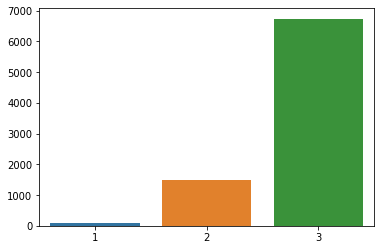

In [33]:
#Creating a barplot for 'accident_severity' column
x=['1','2','3']
y=[75,1489,6733]
sns.barplot(x=x,y=y)

The above graph displays the level of the severity of the accident along with the counts. In the graph, 1 denotes ‘Fatal’, 2 represents ‘Serious’, and 3 highlights ‘Slight’ as the condition of the accident. 

•	The 2nd graph is plotted to another uni-variate variable called ‘age_of_driver’. Since this is a numerical variable, we will be plotting a histogram graph for it.

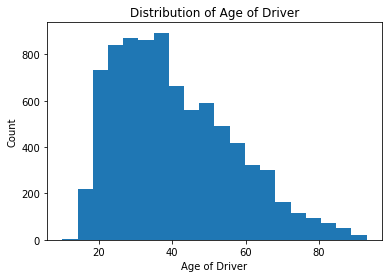

In [34]:
#plotting histogram for 'age_of_driver' column
plt.hist(final_data['age_of_driver'],bins=20)
plt.xlabel('Age of Driver')
plt.ylabel('Count')
plt.title('Distribution of Age of Driver')
plt.show()

The above graph demonstrates the distribution of the driver as per their age criteria. We can observe that the age of the drivers is from 14 to 94 years range. Drivers between the age of 22 to 38 years old are involved in a lot of accidents.

•	The 3rd visualization is done on ‘day_of_week’ variable. We are plotting a barplot for this, as it’s a categorical variable. First, identifying value counts for each category available in the variable and then plotting the graph as per the counts achieved

In [35]:
#Performing value counts on the categorical variable 'day_of_week' 
final_data['day_of_week'].value_counts()

6    1416
4    1230
5    1219
3    1215
7    1154
2    1109
1     938
Name: day_of_week, dtype: int64

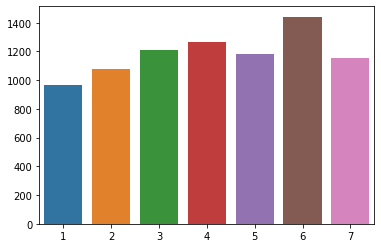

In [36]:
#Creating a barplot for day_of_week column
x=['1','2','3','4','5','6','7']
y=[966,1080,1209,1263,1185,1442,1152]
sns.barplot(x=x,y=y)

With the help of the graph, Saturday is the day when there are a lot of accidents observed as compared to the other days of the week.

## Bi-Variate Variable

Creating a boxplot graph for visualizing ‘age_of_driver’ and ‘sex_of_driver’. We specify the categorical variable ('sex_of_driver') as the x parameter and the continuous variable (‘age_of_driver’) as the y parameter.


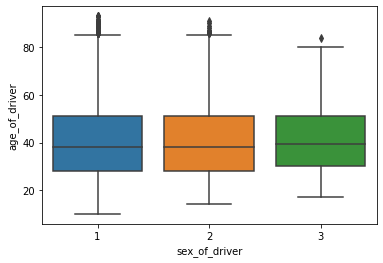

In [37]:
#Creating boxplot for 'sex_of_driver' and 'age_of_driver' column
x=final_data['sex_of_driver']
y=final_data['age_of_driver']
sns.boxplot(x=x,y=y)

The boxplot visually represents the distribution of the continuous variable within each category. It shows the median, quartiles, and potential outliers for each category.

In [38]:
#Running the correlation matrix and selecting the top 8 variables which have the greatest correlation with
correlation_matrix = final_variable.corr()
correlation_matrix

,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,road_type,speed_limit,age_of_driver,junction_control,driver_home_area_type,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,vehicle_manoeuvre,vehicle_location_restricted_lane,sex_of_driver,propulsion_code,casualty_class,casualty_type
accident_severity,1.000000,0.004537,-0.110928,0.004806,-0.038629,-0.114573,-0.027450,0.004435,-0.065105,0.069569,-0.052290,0.039994,0.028542,-0.003028,0.100888,0.119397,0.064738,0.022924,-0.077805,0.041548
number_of_vehicles,0.004537,1.000000,0.254991,-0.003207,0.018391,0.087691,0.005960,-0.036675,0.017188,-0.046730,-0.036808,-0.046666,-0.040751,0.048697,-0.081911,-0.070308,0.017454,0.002013,-0.252628,0.167535
number_of_casualties,-0.110928,0.254991,1.000000,-0.012250,0.033958,0.184789,-0.021911,-0.048898,0.048392,-0.057169,0.041903,-0.053918,-0.023636,0.062607,-0.093983,-0.108586,-0.001745,0.005354,0.167069,0.201698
day_of_week,0.004806,-0.003207,-0.012250,1.000000,0.005123,-0.005049,0.004510,0.010912,0.008190,-0.000179,0.015632,-0.001706,-0.009911,-0.003806,0.009832,0.011329,0.007048,0.000370,0.004638,-0.005328
road_type,-0.038629,0.018391,0.033958,0.005123,1.000000,-0.080090,0.003356,0.135343,0.050614,-0.023829,-0.001505,0.038961,0.091446,-0.015814,0.064481,0.062135,0.011337,-0.003454,0.023274,-0.001155
speed_limit,-0.114573,0.087691,0.184789,-0.005049,-0.080090,1.000000,0.078946,0.025982,0.309606,-0.225873,0.016591,-0.045690,-0.023265,0.109808,-0.170871,-0.190812,0.001950,-0.042752,-0.041900,0.158298
age_of_driver,-0.027450,0.005960,-0.021911,0.004510,0.003356,0.078946,1.000000,0.000850,0.087366,-0.047857,-0.123273,-0.025271,-0.022737,0.089787,-0.066546,-0.054334,0.001449,0.085020,0.027086,0.004379
junction_control,0.004435,-0.036675,-0.048898,0.010912,0.135343,0.025982,0.000850,1.000000,0.036941,-0.137659,-0.016697,0.071678,0.101653,-0.044512,0.275075,0.269036,0.041829,-0.000046,-0.036982,-0.031919
driver_home_area_type,-0.065105,0.017188,0.048392,0.008190,0.050614,0.309606,0.087366,0.036941,1.000000,-0.135408,-0.016746,-0.032649,-0.015308,0.052549,-0.091066,-0.102595,0.040829,-0.021301,-0.017293,0.060474
pedestrian_crossing_physical_facilities,0.069569,-0.046730,-0.057169,-0.000179,-0.023829,-0.225873,-0.047857,-0.137659,-0.135408,1.000000,0.029718,0.102922,0.143625,-0.050791,0.356206,0.362936,0.027531,0.029254,0.012819,-0.056181


In [39]:
target_correlations = correlation_matrix['accident_severity']
target_correlations

accident_severity                          1.000000
number_of_vehicles                         0.004537
number_of_casualties                      -0.110928
day_of_week                                0.004806
road_type                                 -0.038629
speed_limit                               -0.114573
age_of_driver                             -0.027450
junction_control                           0.004435
driver_home_area_type                     -0.065105
pedestrian_crossing_physical_facilities    0.069569
light_conditions                          -0.052290
weather_conditions                         0.039994
road_surface_conditions                    0.028542
vehicle_type                              -0.003028
vehicle_manoeuvre                          0.100888
vehicle_location_restricted_lane           0.119397
sex_of_driver                              0.064738
propulsion_code                            0.022924
casualty_class                            -0.077805
casualty_typ

In [40]:
sorted_correlations = target_correlations.abs().sort_values(ascending=False)
top_5_variables = sorted_correlations[1:6]  # Exclude the target variable itself
top_5_variable_names = top_5_variables.index.tolist()
top_5_variable_names

['vehicle_location_restricted_lane',
 'speed_limit',
 'number_of_casualties',
 'vehicle_manoeuvre',
 'casualty_class']

## Heatmap for categorical variables
A Heatmap graph is created with 5 categorical variables such as 'accident_severity', 'speed_limit','vehicle_type', 'number_of_vehicles', 'vehicle_manoeuvre'. The heatmap is showing the correlation between the variables.

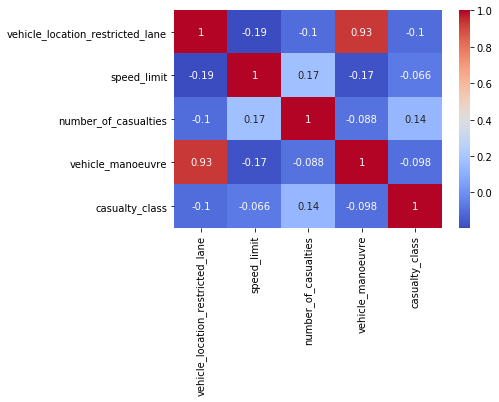

In [41]:
# Assuming you have a DataFrame df containing the data
# You may need to reshape your data into a matrix form if it's not already in that format

# Create a correlation matrix
corr_matrix = final_data[['vehicle_location_restricted_lane',
 'speed_limit',
 'number_of_casualties',
 'vehicle_manoeuvre',
 'casualty_class']].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Display the plot
plt.show()

From the above graph, it is evident that the correlation values of all the variables with other variables are not more than 0.2

# Standardization

We only applied standardization on only the speed_limit column because it is a continuous variable. Standardization can't be applied on categorical columns because it was affecting the shape of our data, and hence, the inferences which would be made from it in our individual assignments.

In [42]:
# Extract the speed_limit column as a numpy array
speed_limit = final_data['speed_limit'].values

# Calculate mean and standard deviation
speed_mean = np.mean(speed_limit)
speed_std = np.std(speed_limit)

# Standardize speed_limit column
final_data['standardized_speed'] = (speed_limit - speed_mean) / speed_std

# Print the updated DataFrame
print(final_data)

       accident_index  accident_severity  number_of_vehicles  \
131762  2021520103818                  3                   4   
25005   2021010319400                  3                   2   
40265   2021061064926                  3                   3   
100473  2021302100283                  3                   2   
81906   2021201063182                  3                   2   
...               ...                ...                 ...   
98606   2021231061198                  3                   1   
115952  202134NNC3601                  3                   2   
73728   2021161031930                  3                   2   
128914  2021401055962                  2                   1   
15880   2021010308620                  3                   2   

        number_of_casualties        date  day_of_week   time  \
131762                     1  17/05/2021            2  12:30   
25005                      1  16/07/2021            6  19:00   
40265                      3  10/07/202

C:\ProgramData\Anaconda3_2020\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


# Train-Test split

The train-test split is used to evaluate model performance on unseen data, prevent overfitting, and tune hyperparameters. It helps assess generalization ability and avoid data leakage, enabling reliable estimation of a model's performance and selection of optimal settings.

In [43]:
X=independent_variable
y=dependent_variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6624, 23)
X_test shape: (1657, 23)
y_train shape: (6624,)
y_test shape: (1657,)


In [44]:
# // %%javascript
# // var nb = IPython.notebook;
# // var kernel = IPython.notebook.kernel;
# // var command = "NOTEBOOK_FULL_PATH = '" + nb.notebook_path + "'";
# // kernel.execute(command);

In [45]:
# import io
# from nbformat import read, NO_CONVERT

# with io.open(NOTEBOOK_FULL_PATH.split("/")[-1], 'r', encoding='utf-8') as f:
#     nb = read(f, NO_CONVERT)

# word_count = 0
# for cell in nb.cells:
#     if cell.cell_type == "markdown":
#         word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
# # print(f"Word count: {word_count}")

In [46]:
# pip install openpyxl

# Individual Assignment

Candidate number: 379597 <br>
220288633

**Predicting Accident Severity based on multiple factors**

After critical assessment of accident severity, Street Safe Solution will be providing insurance offerings to match the specific needs of the driver.

By implementing Machine learning algorithms and data science methodologies we will be managing the risk of severe accidents enabling us to offer better coverage, and define specific policies to reduce accident severity to foster a safer driving environment for our customers and policyholders. 

Firstly, we will establish a baseline method for predicting accident severity. explore feature selection techniques to find out which independent variables are the most influential. Afterthat, we will be performing hyperparameter tuning for optimization of our model performance. Moving on, we will evaluate how effecting each of the predictive machine learning models are, and finally conclude our findings, providing key insights for improvements in the safety in the future.

# Importing Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification

We will be importing more libraries as the need arises once we progress

# Train-Test Split

We already applied train test split function onto our dataset in our group project where X refers to all our features and y referes to our target variable (accident severity). <br>
I will be running the same code below to show our 20% of data being left for testing and the rest 80% for our training.


In [48]:
X=independent_variable
y=dependent_variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6624, 23)
X_test shape: (1657, 23)
y_train shape: (6624,)
y_test shape: (1657,)


# Exploring the Training Data

In [49]:
# Calculate summary statistics
X.describe()


,number_of_vehicles,number_of_casualties,day_of_week,road_type,speed_limit,age_of_driver,junction_control,driver_home_area_type,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,vehicle_manoeuvre,vehicle_location_restricted_lane,sex_of_driver,propulsion_code,casualty_class,casualty_type
count,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000
mean,2.033450,1.550900,4.152880,5.152156,33.698829,40.751962,3.698104,1.249487,1.444874,1.843135,1.583625,1.326048,9.039005,19.760053,8.539186,1.346818,1.785895,1.341022,7.138993
std,0.615984,0.932297,1.940182,1.828660,11.913562,16.070687,1.165178,0.605586,2.562246,1.531364,1.726475,0.871840,3.533491,24.849183,27.612496,0.508377,1.583024,0.617866,6.465301
min,1.000000,1.000000,1.000000,1.000000,20.000000,10.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,3.000000,6.000000,30.000000,28.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,9.000000,8.000000,0.000000,1.000000,1.000000,1.000000,3.000000
50%,2.000000,1.000000,4.000000,6.000000,30.000000,38.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,9.000000,17.000000,0.000000,1.000000,1.000000,1.000000,9.000000
75%,2.000000,2.000000,6.000000,6.000000,30.000000,51.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,18.000000,0.000000,2.000000,2.000000,2.000000,9.000000
max,9.000000,10.000000,7.000000,9.000000,70.000000,93.000000,9.000000,3.000000,9.000000,7.000000,9.000000,9.000000,97.000000,99.000000,99.000000,3.000000,12.000000,3.000000,98.000000


In [50]:
#From the above summary statistics, the count of each feature is common. This proves in our training data, each column has equal
#values. However, the descriptive statistics are different as per the feature.

In [51]:
X_train.describe()

,number_of_vehicles,number_of_casualties,day_of_week,road_type,speed_limit,age_of_driver,junction_control,driver_home_area_type,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,vehicle_manoeuvre,vehicle_location_restricted_lane,sex_of_driver,propulsion_code,casualty_class,casualty_type
count,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000
mean,2.033062,1.557971,4.147947,5.141908,33.682065,40.807518,3.693086,1.253774,1.435688,1.843599,1.585145,1.324275,9.025966,19.672856,8.513436,1.344807,1.786534,1.344354,7.143418
std,0.616076,0.942058,1.944613,1.840073,11.917822,16.174552,1.166822,0.610988,2.550667,1.526255,1.733313,0.881766,3.580559,24.845633,27.569387,0.506706,1.579833,0.618982,6.420159
min,1.000000,1.000000,1.000000,1.000000,20.000000,14.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,3.000000,6.000000,30.000000,28.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,9.000000,8.000000,0.000000,1.000000,1.000000,1.000000,3.000000
50%,2.000000,1.000000,4.000000,6.000000,30.000000,38.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,9.000000,17.000000,0.000000,1.000000,1.000000,1.000000,9.000000
75%,2.000000,2.000000,6.000000,6.000000,30.000000,51.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,18.000000,0.000000,2.000000,2.000000,2.000000,9.000000
max,9.000000,10.000000,7.000000,9.000000,70.000000,93.000000,9.000000,3.000000,9.000000,7.000000,9.000000,9.000000,97.000000,99.000000,99.000000,3.000000,12.000000,3.000000,98.000000


In [52]:
#The above description provides key insights
#Most of our accidents involve only 2 vehicles
#Mostly number of casualties are 1 to 2 per accident. However, in one of the accidents, 10 people died.
#28 to 51 year old drivers are the ones involved in the accidents.

# Analyzing the correlated features

In [53]:
# To check for the how each feature correlate with our target variable we use our final data used in our group assignment.

In [54]:
final_data.shape

(8281, 25)

In [55]:
final_data.corr()

,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,road_type,speed_limit,age_of_driver,junction_control,driver_home_area_type,pedestrian_crossing_physical_facilities,...,weather_conditions,road_surface_conditions,vehicle_type,vehicle_manoeuvre,vehicle_location_restricted_lane,sex_of_driver,propulsion_code,casualty_class,casualty_type,standardized_speed
accident_severity,1.000000,0.033224,-0.096094,0.009230,-0.016839,-0.102433,-0.022017,0.010583,-0.066354,0.074870,...,0.024132,0.030121,0.011819,0.107893,0.126746,0.068976,0.026513,-0.085996,0.050350,-0.102433
number_of_vehicles,0.033224,1.000000,0.195876,-0.008423,0.009312,0.088794,0.008951,-0.016385,0.029427,-0.053582,...,-0.043797,-0.022335,0.063378,-0.052087,-0.040547,0.027742,-0.020150,-0.350475,0.182333,0.088794
number_of_casualties,-0.096094,0.195876,1.000000,-0.004303,0.020676,0.172955,-0.023114,-0.052671,0.056012,-0.048360,...,-0.038454,-0.012545,0.072226,-0.087927,-0.102217,-0.003614,0.004153,0.135916,0.189485,0.172955
day_of_week,0.009230,-0.008423,-0.004303,1.000000,0.019211,0.010175,0.017303,-0.001432,0.022424,0.006895,...,-0.005043,-0.005339,-0.003618,0.011272,0.018223,0.017134,0.006019,0.001034,-0.007837,0.010175
road_type,-0.016839,0.009312,0.020676,0.019211,1.000000,-0.100343,-0.003836,0.136795,0.052855,-0.003133,...,0.053962,0.093417,-0.025366,0.074590,0.074340,0.005717,0.009211,0.021305,0.008018,-0.100343
speed_limit,-0.102433,0.088794,0.172955,0.010175,-0.100343,1.000000,0.074963,0.012590,0.310662,-0.213635,...,-0.040553,-0.021591,0.118618,-0.173077,-0.193359,0.011904,-0.047657,-0.065883,0.153164,1.000000
age_of_driver,-0.022017,0.008951,-0.023114,0.017303,-0.003836,0.074963,1.000000,-0.004509,0.081214,-0.050164,...,-0.006500,-0.012786,0.095114,-0.074664,-0.058828,-0.003099,0.093096,0.032481,-0.002788,0.074963
junction_control,0.010583,-0.016385,-0.052671,-0.001432,0.136795,0.012590,-0.004509,1.000000,0.029391,-0.131386,...,0.080273,0.130911,-0.052434,0.280053,0.275657,0.032835,-0.000541,-0.048725,-0.033932,0.012590
driver_home_area_type,-0.066354,0.029427,0.056012,0.022424,0.052855,0.310662,0.081214,0.029391,1.000000,-0.132094,...,-0.017878,-0.004487,0.053698,-0.098220,-0.108229,0.039023,-0.023012,-0.028582,0.059683,0.310662
pedestrian_crossing_physical_facilities,0.074870,-0.053582,-0.048360,0.006895,-0.003133,-0.213635,-0.050164,-0.131386,-0.132094,1.000000,...,0.096837,0.144019,-0.051140,0.357969,0.361378,0.011990,0.033967,0.021412,-0.058930,-0.213635


# Feature Engineering/Scaling

 **Converting my Standardized speed values back to normal so that we can show linear regression between Speed feature and target variable accident severity**

In [56]:
# Retrieve the mean and standard deviation of the original 'speed_limit' column
mean_speed = final_data['speed_limit'].mean()
std_speed = final_data['speed_limit'].std()

# Convert the standardized values back to normal
final_data['original_speed'] = (final_data['standardized_speed'] * std_speed) + mean_speed

C:\ProgramData\Anaconda3_2020\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
final_data.describe()

,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,road_type,speed_limit,age_of_driver,junction_control,driver_home_area_type,pedestrian_crossing_physical_facilities,...,road_surface_conditions,vehicle_type,vehicle_manoeuvre,vehicle_location_restricted_lane,sex_of_driver,propulsion_code,casualty_class,casualty_type,standardized_speed,original_speed
count,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,...,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8281.000000,8.281000e+03,8281.000000
mean,2.804734,2.033450,1.550900,4.152880,5.152156,33.698829,40.751962,3.698104,1.249487,1.444874,...,1.326048,9.039005,19.760053,8.539186,1.346818,1.785895,1.341022,7.138993,-9.814902e-16,33.698829
std,0.419520,0.615984,0.932297,1.940182,1.828660,11.913562,16.070687,1.165178,0.605586,2.562246,...,0.871840,3.533491,24.849183,27.612496,0.508377,1.583024,0.617866,6.465301,1.000060e+00,11.914281
min,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,10.000000,1.000000,1.000000,0.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-1.149921e+00,19.999173
25%,3.000000,2.000000,1.000000,3.000000,6.000000,30.000000,28.000000,4.000000,1.000000,0.000000,...,1.000000,9.000000,8.000000,0.000000,1.000000,1.000000,1.000000,3.000000,-3.104909e-01,29.999777
50%,3.000000,2.000000,1.000000,4.000000,6.000000,30.000000,38.000000,4.000000,1.000000,0.000000,...,1.000000,9.000000,17.000000,0.000000,1.000000,1.000000,1.000000,9.000000,-3.104909e-01,29.999777
75%,3.000000,2.000000,2.000000,6.000000,6.000000,30.000000,51.000000,4.000000,1.000000,1.000000,...,1.000000,9.000000,18.000000,0.000000,2.000000,2.000000,2.000000,9.000000,-3.104909e-01,29.999777
max,3.000000,9.000000,10.000000,7.000000,9.000000,70.000000,93.000000,9.000000,3.000000,9.000000,...,9.000000,97.000000,99.000000,99.000000,3.000000,12.000000,3.000000,98.000000,3.047230e+00,70.002192


**Creating a new dataframe from training data, merging independent variables and dependent variable** 

In [58]:
new_train_data = pd.concat([X_train, y_train], axis=1)

new_train_data.describe()

,number_of_vehicles,number_of_casualties,day_of_week,road_type,speed_limit,age_of_driver,junction_control,driver_home_area_type,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,vehicle_manoeuvre,vehicle_location_restricted_lane,sex_of_driver,propulsion_code,casualty_class,casualty_type,accident_severity
count,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000
mean,2.033062,1.557971,4.147947,5.141908,33.682065,40.807518,3.693086,1.253774,1.435688,1.843599,1.585145,1.324275,9.025966,19.672856,8.513436,1.344807,1.786534,1.344354,7.143418,2.804801
std,0.616076,0.942058,1.944613,1.840073,11.917822,16.174552,1.166822,0.610988,2.550667,1.526255,1.733313,0.881766,3.580559,24.845633,27.569387,0.506706,1.579833,0.618982,6.420159,0.421491
min,1.000000,1.000000,1.000000,1.000000,20.000000,14.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2.000000,1.000000,3.000000,6.000000,30.000000,28.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,9.000000,8.000000,0.000000,1.000000,1.000000,1.000000,3.000000,3.000000
50%,2.000000,1.000000,4.000000,6.000000,30.000000,38.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,9.000000,17.000000,0.000000,1.000000,1.000000,1.000000,9.000000,3.000000
75%,2.000000,2.000000,6.000000,6.000000,30.000000,51.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,18.000000,0.000000,2.000000,2.000000,2.000000,9.000000,3.000000
max,9.000000,10.000000,7.000000,9.000000,70.000000,93.000000,9.000000,3.000000,9.000000,7.000000,9.000000,9.000000,97.000000,99.000000,99.000000,3.000000,12.000000,3.000000,98.000000,3.000000


**Linear regression between accident_severity and original_speed on my original dataset**

In [59]:
from sklearn.linear_model import LinearRegression

# Select the 'accident_severity' and 'original_speed' columns
X1 = final_data[['original_speed']]
y1 = final_data['accident_severity']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X1, y1)

# Get the coefficients and intercept of the linear regression model
coefficient = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print('Coefficient:', coefficient[0])
print('Intercept:', intercept)

Coefficient: -0.0036068078044687027
Intercept: 2.926278925964864


**Linear regression between accident_severity and original_speed on my merged training dataset**

In [60]:
X2 = new_train_data[['speed_limit']]
y2 = new_train_data['accident_severity']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X2, y2)

# Get the coefficients and intercept of the linear regression model
coefficient = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print('Coefficient:', coefficient[0])
print('Intercept:', intercept)

Coefficient: -0.003666535663769438
Intercept: 2.9282972179866547


In [61]:
#No difference between the coefficients.

**Since our data has most of the features which are categorical in nature, applying standard scaling would distort the meaning of our data**

**CHECKING FOR CORRELATIONS AND SELECTING THE TOP 5 HIGHLY CORRELATED VARIABLES**

In [62]:
correlation_matrix2 = new_train_data.corr()
correlation_matrix2
target_correlations2 = correlation_matrix2['accident_severity']
target_correlations2
sorted_correlations2 = target_correlations2.abs().sort_values(ascending=False)
top_5_variables2 = sorted_correlations2[1:6]  # Exclude the target variable itself
top_5_variable_names2 = top_5_variables2.index.tolist()
top_5_variable_names2

['vehicle_location_restricted_lane',
 'vehicle_manoeuvre',
 'number_of_casualties',
 'speed_limit',
 'casualty_class']

# Logistic Regression

**Therefore, we will be performing one-hot encoding on ['vehicle_location_restricted_lane','speed_limit','number_of_casualties','vehicle_manoeuvre','casualty_class'] which are top 5 highly correlated features**

In [90]:
from sklearn.linear_model import LogisticRegression

# Assuming your training dataset is called 'X_train' and the target variable is 'accident_severity'
# Assuming the top 5 columns are ['vehicle_location_restricted_lane', 'speed_limit', 'vehicle_manoeuvre', 'number_of_casualties', 'pedestrian_crossing_physical_facilities']

# Subset the 'X_train' dataset to include only the top 5 columns
X_subset = X_train[['vehicle_location_restricted_lane', 'speed_limit', 'vehicle_manoeuvre', 'number_of_casualties', 'casualty_class']]

# Create dummy variables for the subsetted columns
X_dummies = pd.get_dummies(X_subset, drop_first=True)

# Fit a logistic regression model using the dummy variables and the 'accident_severity' target variable
logistic_regression = LogisticRegression()
logistic_regression.fit(X_dummies, y_train)

# Predict the 'accident_severity' for the training data
y_train_pred = logistic_regression.predict(X_dummies)





C:\ProgramData\Anaconda3_2020\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming your training dataset is called 'X_train' and the target variable is 'accident_severity'
# Assuming the top 5 columns are ['vehicle_location_restricted_lane', 'speed_limit', 'vehicle_manoeuvre', 'number_of_casualties', 'pedestrian_crossing_physical_facilities']

# Subset the 'X_train' dataset to include only the top 5 columns
X_subset = X_train[['vehicle_location_restricted_lane', 'speed_limit', 'vehicle_manoeuvre', 'number_of_casualties', 'pedestrian_crossing_physical_facilities']]

# Create dummy variables for the subsetted columns
X_dummies = pd.get_dummies(X_subset, drop_first=True)

# Fit a logistic regression model using the dummy variables and the 'accident_severity' target variable
logistic_regression = LogisticRegression()
logistic_regression.fit(X_dummies, y_train)

# Predict the 'accident_severity' for the training data
y_train_pred = logistic_regression.predict(X_dummies)

# Calculate accuracy metrics for the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Subset the 'X_test' dataset to include only the top 5 columns
X_test_subset = X_test[['vehicle_location_restricted_lane', 'speed_limit', 'vehicle_manoeuvre', 'number_of_casualties', 'pedestrian_crossing_physical_facilities']]

# Create dummy variables for the subsetted columns in the test data
X_test_dummies = pd.get_dummies(X_test_subset, drop_first=True)

# Predict the 'accident_severity' for the test data
y_test_pred = logistic_regression.predict(X_test_dummies)

# Calculate accuracy metrics for the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the accuracy metrics
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1)

print("Testing Accuracy:", test_accuracy)
print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)
print("Testing F1 Score:", test_f1)

Training Accuracy: 0.815066425120773
Training Precision: 0.6643332773591566
Training Recall: 0.815066425120773
Training F1 Score: 0.7320208981497219
Testing Accuracy: 0.8105009052504526
Testing Precision: 0.6569117174118031
Testing Recall: 0.8105009052504526
Testing F1 Score: 0.7256684771675719


C:\ProgramData\Anaconda3_2020\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3_2020\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3_2020\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.

### Model Evaluation on Training and Testing data

In [92]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model on the subset of training data
accuracy = accuracy_score(y_train, y_train_pred)

print("Accuracy on Subset of Training Data:", accuracy)


Accuracy on Subset of Training Data: 0.815066425120773


accident_severity	1	Fatal <br>
accident_severity	2	Serious <br>
accident_severity	3	Slight


The accuracy score of 81.5% is a really good score. It means that out of a 100 times, our model can accurately predict the accident severity, whether it is Fatal, serious or slight

**Now we will apply the same preprocessing steps to our test data. We will be subsetting the same columns as done while training the model ensuring consistency in the features used for prediction**

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming your test dataset is called 'X_test' and the target variable is 'accident_severity'

# Subset the 'X_test' dataset to include only the top 5 columns
X_test_subset = X_test[['vehicle_location_restricted_lane', 'speed_limit', 'vehicle_manoeuvre', 'number_of_casualties', 'pedestrian_crossing_physical_facilities']]

# Create dummy variables for the subsetted columns in the test dataset
X_test_dummies = pd.get_dummies(X_test_subset, drop_first=True)

# Predict the 'accident_severity' for the test data
y_test_pred = logistic_regression.predict(X_test_dummies)

# Evaluate the performance of the model on the test dataset
accuracy = accuracy_score(y_test, y_test_pred)
confusion_matrix = confusion_matrix(y_test, y_test_pred)

print("Accuracy on subset of test data:", accuracy)
print("Confusion Matrix:")
print(confusion_matrix)


Accuracy on subset of test data: 0.8105009052504526
Confusion Matrix:
[[   0    0   10]
 [   0    0  304]
 [   0    0 1343]]


In [94]:
import pandas as pd


# Create a DataFrame to store the accuracy metrics
data = {
    'Metric': ["Accuracy", "Precision", "Recall", "F1 Score"],
    'Training': [train_accuracy, train_precision, train_recall, train_f1],
    'Testing': [test_accuracy, test_precision, test_recall, test_f1]
}

df = pd.DataFrame(data)

df.set_index('Metric', inplace=True)

print(df)



           Training   Testing
Metric                       
Accuracy   0.815066  0.810501
Precision  0.664333  0.656912
Recall     0.815066  0.810501
F1 Score   0.732021  0.725668


Both training and testing Metrics of accuracy, precision, recall, and F1-score are similar values.<br>
By training accuracy of 81.5, model correct predicts accident severity with this %.<br>
By testing accuracy we mean model achieves 81% accuracy on unseen data.

Class 1 ROC AUC Score: 0.4264302121092488
Class 2 ROC AUC Score: 0.5959735785657608
Class 3 ROC AUC Score: 0.6046264047385949


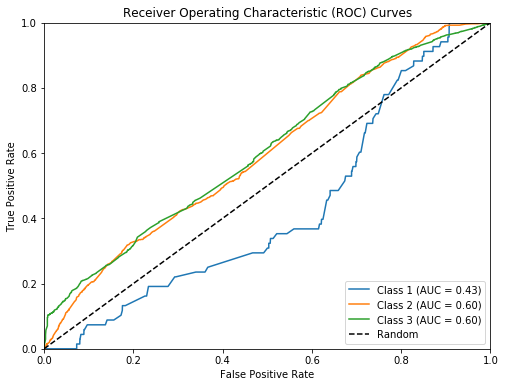

In [96]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Calculate the predicted probabilities for each class
y_train_probs = logistic_regression.predict_proba(X_dummies)

# Calculate the ROC AUC score for each class
roc_auc_scores = []
for i in range(len(logistic_regression.classes_)):
    y_train_one_vs_rest = np.where(y_train == logistic_regression.classes_[i], 1, 0)
    roc_auc = roc_auc_score(y_train_one_vs_rest, y_train_probs[:, i])
    roc_auc_scores.append(roc_auc)
    print("Class", logistic_regression.classes_[i], "ROC AUC Score:", roc_auc)

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(logistic_regression.classes_)):
    fpr, tpr, _ = roc_curve(np.where(y_train == logistic_regression.classes_[i], 1, 0), y_train_probs[:, i])
    plt.plot(fpr, tpr, label="Class %d (AUC = %0.2f)" % (logistic_regression.classes_[i], roc_auc_scores[i]))

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()



The ROC AUC Score measures the performance of each of our accident severity classes: Fatal. Serious, and Slight.<br>
Slight has the highest ROC AUC Score followed by Serious and Fatal. <br>
The model for our Slight class performs the best since it is closest to 1 as compare to other 2.<br>
Fatal class has the lower-than-random performance.

# Decision Tree

We will be applying decision tree classifier after dropping a few columns from our original dataset and then creating dummies for the ones which are left. 

In [144]:
X_train.columns

Index(['accident_index', 'number_of_vehicles', 'number_of_casualties', 'date',
       'day_of_week', 'time', 'local_authority_highway', 'road_type',
       'speed_limit', 'age_of_driver', 'junction_control',
       'driver_home_area_type', 'pedestrian_crossing_physical_facilities',
       'light_conditions', 'weather_conditions', 'road_surface_conditions',
       'vehicle_type', 'vehicle_manoeuvre', 'vehicle_location_restricted_lane',
       'sex_of_driver', 'propulsion_code', 'casualty_class', 'casualty_type'],
      dtype='object')

In [145]:
columns_to_drop = ['date', 'time', 'local_authority_highway', 'propulsion_code', 'accident_index']

X_train_modified = X_train.drop(columns=columns_to_drop)

# Print the column names of the modified X_train DataFrame
print(X_train_modified.columns)


Index(['number_of_vehicles', 'number_of_casualties', 'day_of_week',
       'road_type', 'speed_limit', 'age_of_driver', 'junction_control',
       'driver_home_area_type', 'pedestrian_crossing_physical_facilities',
       'light_conditions', 'weather_conditions', 'road_surface_conditions',
       'vehicle_type', 'vehicle_manoeuvre', 'vehicle_location_restricted_lane',
       'sex_of_driver', 'casualty_class', 'casualty_type'],
      dtype='object')


In [146]:
# Specify the columns for which you want to create dummy variables
columns_to_encode = ['day_of_week', 'road_type', 'speed_limit', 'age_of_driver', 'junction_control',
                     'driver_home_area_type', 'pedestrian_crossing_physical_facilities', 'light_conditions',
                     'weather_conditions', 'road_surface_conditions', 'vehicle_type', 'vehicle_manoeuvre',
                     'vehicle_location_restricted_lane', 'sex_of_driver', 'casualty_class', 'casualty_type']

# Create dummy variables for the specified columns
X_train_encoded = pd.get_dummies(X_train_modified, columns=columns_to_encode, drop_first=True)

# Print the column names of the encoded DataFrame
print(X_train_encoded.columns)


Index(['number_of_vehicles', 'number_of_casualties', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',
       'day_of_week_7', 'road_type_2', 'road_type_3',
       ...
       'casualty_type_17', 'casualty_type_18', 'casualty_type_19',
       'casualty_type_20', 'casualty_type_21', 'casualty_type_22',
       'casualty_type_23', 'casualty_type_90', 'casualty_type_97',
       'casualty_type_98'],
      dtype='object', length=192)


In [147]:
X_test.columns

Index(['accident_index', 'number_of_vehicles', 'number_of_casualties', 'date',
       'day_of_week', 'time', 'local_authority_highway', 'road_type',
       'speed_limit', 'age_of_driver', 'junction_control',
       'driver_home_area_type', 'pedestrian_crossing_physical_facilities',
       'light_conditions', 'weather_conditions', 'road_surface_conditions',
       'vehicle_type', 'vehicle_manoeuvre', 'vehicle_location_restricted_lane',
       'sex_of_driver', 'propulsion_code', 'casualty_class', 'casualty_type'],
      dtype='object')

In [148]:
columns_to_drop_Xtest = ['date', 'time', 'local_authority_highway', 'propulsion_code', 'accident_index']

X_test_modified = X_test.drop(columns=columns_to_drop_Xtest)

# Print the column names of the modified X_train DataFrame
print(X_test_modified.columns)

Index(['number_of_vehicles', 'number_of_casualties', 'day_of_week',
       'road_type', 'speed_limit', 'age_of_driver', 'junction_control',
       'driver_home_area_type', 'pedestrian_crossing_physical_facilities',
       'light_conditions', 'weather_conditions', 'road_surface_conditions',
       'vehicle_type', 'vehicle_manoeuvre', 'vehicle_location_restricted_lane',
       'sex_of_driver', 'casualty_class', 'casualty_type'],
      dtype='object')


In [149]:
# Specify the columns for which you want to create dummy variables
columns_to_encodeXtest = ['day_of_week', 'road_type', 'speed_limit', 'age_of_driver', 'junction_control',
                     'driver_home_area_type', 'pedestrian_crossing_physical_facilities', 'light_conditions',
                     'weather_conditions', 'road_surface_conditions', 'vehicle_type', 'vehicle_manoeuvre',
                     'vehicle_location_restricted_lane', 'sex_of_driver', 'casualty_class', 'casualty_type']

# Create dummy variables for the specified columns
X_test_encoded = pd.get_dummies(X_test_modified, columns=columns_to_encodeXtest, drop_first=True)

# Print the column names of the encoded DataFrame
print(X_test_encoded.columns)

Index(['number_of_vehicles', 'number_of_casualties', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',
       'day_of_week_7', 'road_type_2', 'road_type_3',
       ...
       'casualty_type_8', 'casualty_type_9', 'casualty_type_11',
       'casualty_type_19', 'casualty_type_20', 'casualty_type_21',
       'casualty_type_22', 'casualty_type_23', 'casualty_type_90',
       'casualty_type_97'],
      dtype='object', length=176)


In [150]:
pd.set_option('display.max_columns', None)
X_test_encoded

,number_of_vehicles,number_of_casualties,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,road_type_2,road_type_3,road_type_6,road_type_7,road_type_9,speed_limit_30,speed_limit_40,speed_limit_50,speed_limit_60,speed_limit_70,age_of_driver_15,age_of_driver_16,age_of_driver_17,age_of_driver_18,age_of_driver_19,age_of_driver_20,age_of_driver_21,age_of_driver_22,age_of_driver_23,age_of_driver_24,age_of_driver_25,age_of_driver_26,age_of_driver_27,age_of_driver_28,age_of_driver_29,age_of_driver_30,age_of_driver_31,age_of_driver_32,age_of_driver_33,age_of_driver_34,age_of_driver_35,age_of_driver_36,age_of_driver_37,age_of_driver_38,age_of_driver_39,age_of_driver_40,age_of_driver_41,age_of_driver_42,age_of_driver_43,age_of_driver_44,age_of_driver_45,age_of_driver_46,age_of_driver_47,age_of_driver_48,age_of_driver_49,age_of_driver_50,age_of_driver_51,age_of_driver_52,age_of_driver_53,age_of_driver_54,age_of_driver_55,age_of_driver_56,age_of_driver_57,age_of_driver_58,age_of_driver_59,age_of_driver_60,age_of_driver_61,age_of_driver_62,age_of_driver_63,age_of_driver_64,age_of_driver_65,age_of_driver_66,age_of_driver_67,age_of_driver_68,age_of_driver_69,age_of_driver_70,age_of_driver_71,age_of_driver_72,age_of_driver_73,age_of_driver_74,age_of_driver_75,age_of_driver_76,age_of_driver_77,age_of_driver_78,age_of_driver_79,age_of_driver_80,age_of_driver_81,age_of_driver_82,age_of_driver_83,age_of_driver_85,age_of_driver_86,age_of_driver_87,age_of_driver_88,age_of_driver_91,age_of_driver_93,junction_control_2.0,junction_control_3.0,junction_control_4.0,junction_control_9.0,driver_home_area_type_2,driver_home_area_type_3,pedestrian_crossing_physical_facilities_1,pedestrian_crossing_physical_facilities_4,pedestrian_crossing_physical_facilities_5,pedestrian_crossing_physical_facilities_7,pedestrian_crossing_physical_facilities_8,pedestrian_crossing_physical_facilities_9,light_conditions_4,light_conditions_5,light_conditions_6,light_conditions_7,weather_conditions_2,weather_conditions_3,weather_conditions_4,weather_conditions_5,weather_conditions_6,weather_conditions_7,weather_conditions_8,weather_conditions_9,road_surface_conditions_2,road_surface_conditions_3,road_surface_conditions_4,road_surface_conditions_9,vehicle_type_3,vehicle_type_4,vehicle_type_5,vehicle_type_8,vehicle_type_9,vehicle_type_10,vehicle_type_11,vehicle_type_17,vehicle_type_19,vehicle_type_20,vehicle_type_21,vehicle_manoeuvre_2,vehicle_manoeuvre_3,vehicle_manoeuvre_4,vehicle_manoeuvre_5,vehicle_manoeuvre_6,vehicle_manoeuvre_7,vehicle_manoeuvre_8,vehicle_manoeuvre_9,vehicle_manoeuvre_10,vehicle_manoeuvre_11,vehicle_manoeuvre_12,vehicle_manoeuvre_13,vehicle_manoeuvre_14,vehicle_manoeuvre_15,vehicle_manoeuvre_16,vehicle_manoeuvre_17,vehicle_manoeuvre_18,vehicle_manoeuvre_99,vehicle_location_restricted_lane_1,vehicle_location_restricted_lane_2,vehicle_location_restricted_lane_4,vehicle_location_restricted_lane_5,vehicle_location_restricted_lane_6,vehicle_location_restricted_lane_9,vehicle_location_restricted_lane_99,sex_of_driver_2,sex_of_driver_3,casualty_class_2,casualty_class_3,casualty_type_1,casualty_type_2,casualty_type_3,casualty_type_4,casualty_type_5,casualty_type_8,casualty_type_9,casualty_type_11,casualty_type_19,casualty_type_20,casualty_type_21,casualty_type_22,casualty_type_23,casualty_type_90,casualty_type_97
144159,2,2,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
62068,2,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0

In [151]:
pd.set_option('display.max_columns', None)
X_train_encoded

,number_of_vehicles,number_of_casualties,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,road_type_2,road_type_3,road_type_6,road_type_7,road_type_9,speed_limit_30,speed_limit_40,speed_limit_50,speed_limit_60,speed_limit_70,age_of_driver_15,age_of_driver_16,age_of_driver_17,age_of_driver_18,age_of_driver_19,age_of_driver_20,age_of_driver_21,age_of_driver_22,age_of_driver_23,age_of_driver_24,age_of_driver_25,age_of_driver_26,age_of_driver_27,age_of_driver_28,age_of_driver_29,age_of_driver_30,age_of_driver_31,age_of_driver_32,age_of_driver_33,age_of_driver_34,age_of_driver_35,age_of_driver_36,age_of_driver_37,age_of_driver_38,age_of_driver_39,age_of_driver_40,age_of_driver_41,age_of_driver_42,age_of_driver_43,age_of_driver_44,age_of_driver_45,age_of_driver_46,age_of_driver_47,age_of_driver_48,age_of_driver_49,age_of_driver_50,age_of_driver_51,age_of_driver_52,age_of_driver_53,age_of_driver_54,age_of_driver_55,age_of_driver_56,age_of_driver_57,age_of_driver_58,age_of_driver_59,age_of_driver_60,age_of_driver_61,age_of_driver_62,age_of_driver_63,age_of_driver_64,age_of_driver_65,age_of_driver_66,age_of_driver_67,age_of_driver_68,age_of_driver_69,age_of_driver_70,age_of_driver_71,age_of_driver_72,age_of_driver_73,age_of_driver_74,age_of_driver_75,age_of_driver_76,age_of_driver_77,age_of_driver_78,age_of_driver_79,age_of_driver_80,age_of_driver_81,age_of_driver_82,age_of_driver_83,age_of_driver_84,age_of_driver_85,age_of_driver_86,age_of_driver_87,age_of_driver_88,age_of_driver_89,age_of_driver_90,age_of_driver_91,age_of_driver_92,age_of_driver_93,junction_control_2.0,junction_control_3.0,junction_control_4.0,junction_control_9.0,driver_home_area_type_2,driver_home_area_type_3,pedestrian_crossing_physical_facilities_1,pedestrian_crossing_physical_facilities_4,pedestrian_crossing_physical_facilities_5,pedestrian_crossing_physical_facilities_7,pedestrian_crossing_physical_facilities_8,pedestrian_crossing_physical_facilities_9,light_conditions_4,light_conditions_5,light_conditions_6,light_conditions_7,weather_conditions_2,weather_conditions_3,weather_conditions_4,weather_conditions_5,weather_conditions_6,weather_conditions_7,weather_conditions_8,weather_conditions_9,road_surface_conditions_2,road_surface_conditions_3,road_surface_conditions_4,road_surface_conditions_5,road_surface_conditions_9,vehicle_type_3,vehicle_type_4,vehicle_type_5,vehicle_type_8,vehicle_type_9,vehicle_type_10,vehicle_type_11,vehicle_type_17,vehicle_type_19,vehicle_type_20,vehicle_type_21,vehicle_type_22,vehicle_type_23,vehicle_type_90,vehicle_type_97,vehicle_manoeuvre_2,vehicle_manoeuvre_3,vehicle_manoeuvre_4,vehicle_manoeuvre_5,vehicle_manoeuvre_6,vehicle_manoeuvre_7,vehicle_manoeuvre_8,vehicle_manoeuvre_9,vehicle_manoeuvre_10,vehicle_manoeuvre_11,vehicle_manoeuvre_12,vehicle_manoeuvre_13,vehicle_manoeuvre_14,vehicle_manoeuvre_15,vehicle_manoeuvre_16,vehicle_manoeuvre_17,vehicle_manoeuvre_18,vehicle_manoeuvre_99,vehicle_location_restricted_lane_1,vehicle_location_restricted_lane_2,vehicle_location_restricted_lane_3,vehicle_location_restricted_lane_4,vehicle_location_restricted_lane_5,vehicle_location_restricted_lane_6,vehicle_location_restricted_lane_8,vehicle_location_restricted_lane_9,vehicle_location_restricted_lane_99,sex_of_driver_2,sex_of_driver_3,casualty_class_2,casualty_class_3,casualty_type_1,casualty_type_2,casualty_type_3,casualty_type_4,casualty_type_5,casualty_type_8,casualty_type_9,casualty_type_10,casualty_type_11,casualty_type_16,casualty_type_17,casualty_type_18,casualty_type_19,casualty_type_20,casualty_type_21,casualty_type_22,casualty_type_23,casualty_type_90,casualty_type_97,casualty_type_98
908,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Eventhough, we have selected exactly the same number of columns for the dummies to be created for X_test and X_train, still X_train has 192 colmns and X_test has 176. <br>
We compared both tables above and removed the non-similar columns.

In [154]:
X_train_encoded.drop(columns=['age_of_driver_84', 'age_of_driver_89', 'age_of_driver_90', 'age_of_driver_92', 'road_surface_conditions_5', 'vehicle_type_22', 'vehicle_type_23', 'vehicle_type_90', 'vehicle_type_97', 'vehicle_location_restricted_lane_3', 'vehicle_location_restricted_lane_8', 'casualty_type_10', 'casualty_type_16', 'casualty_type_17', 'casualty_type_18', 'casualty_type_98'], inplace=True)


In [155]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
decision_tree = DecisionTreeClassifier()


In [156]:
# Fit the decision tree model to the training data
decision_tree.fit(X_train_encoded, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [157]:

# Make predictions on the training data
y_train_pred = decision_tree.predict(X_train_encoded)


In [158]:
# Make predictions on the test data
X_test_encoded = pd.get_dummies(X_test_modified, columns=columns_to_encodeXtest, drop_first=True)


In [159]:
y_test_pred = decision_tree.predict(X_test_encoded)

In [162]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Print the evaluation metrics
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1)


Training Accuracy: 0.9990942028985508
Training Precision: 0.9990966915914262
Training Recall: 0.9990942028985508
Training F1 Score: 0.9990948165984117


Because we dropped the unnecessary columns and created dummy variables for multiple categorical columns, our accuracy, precision recall, and F1 score came out to be almost 1. The model seems to be overfitting.

In [163]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the evaluation metrics
print("Testing Accuracy:", test_accuracy)
print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)
print("Testing F1 Score:", test_f1)


Testing Accuracy: 0.7187688593844297
Testing Precision: 0.7191916646029233
Testing Recall: 0.7187688593844297
Testing F1 Score: 0.7189755667834002


The performance of model drops significantly. <br>
The drop in performance on the test set is an indication of overfitting, where the model has memorized the training data rather than learning the underlying patterns that would allow it to generalize well.<br>



### To improve our model performance, we will apply Hyperparameter Tuning

# HyperParameter Tuning

In [166]:
from sklearn.model_selection import GridSearchCV

In [167]:
#Defining the hyperparameters to tune and their potential values
param_grid = {
'criterion': ['gini', 'entropy'],
'max_depth': [None, 5, 10, 15],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}

In [168]:
#Performing grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train_encoded, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [169]:
#Got the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [170]:
#Created a decision tree classifier with the best hyperparameters
best_decision_tree = DecisionTreeClassifier(**best_params)

In [171]:
##Fitting the decision tree model on the training data
best_decision_tree.fit(X_train_encoded, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [172]:
#Making predictions on the test data
y_test_pred = best_decision_tree.predict(X_test_encoded)

In [173]:
#Evaluating the model's performance on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

C:\ProgramData\Anaconda3_2020\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [174]:
print("Testing Accuracy:", test_accuracy)
print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)
print("Testing F1 Score:", test_f1)

Testing Accuracy: 0.8032589016294508
Testing Precision: 0.7292032365238946
Testing Recall: 0.8032589016294508
Testing F1 Score: 0.7399489100026588


After hyperparameter tuning we see a significant improvement in our model. The testing accuracy increased from 0.719 to 0.803<br>
The testing precision increased a little from 0.719 to 0.729.<br>
Testing recall improved from 0.719 to 0.803, indicating that the model is now able to capture a higher proportion of the positive class instances. This suggests that the model has reduced the number of false negatives.<br>
F1 score has increased from 0.719 to 0.740, which is a measure that considers both precision and recall. Now our model is finding the right balance between precision and recall.

In [176]:
from sklearn.metrics import classification_report

# Make predictions on the test data
y_test_pred = decision_tree.predict(X_test_encoded)

# Generate a classification report
classification_report = classification_report(y_test, y_test_pred)
print(classification_report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.26      0.25      0.25       304
           3       0.83      0.83      0.83      1343

    accuracy                           0.72      1657
   macro avg       0.36      0.36      0.36      1657
weighted avg       0.72      0.72      0.72      1657



The accuracy of the model on the test data is 0.72, which indicates the overall proportion of correct predictions across all classes.<br>
The macro average precision, recall, and F1-score are 0.36, indicating the average performance across all classes.<br>
Weighted average of 0.72 tells that the overall performance of the model is efficient.<br>
Overall, the model performs well for Class 3 (Slight) compared to the other two classes.

# Random Forest Algorithm

We will be performing our analysis on the same training and testing data which we chose for decision trees. This will allow us to also measure the performance amongst differenct algorithms used.

In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Creating a random forest classifier
random_forest = RandomForestClassifier()

# Fitting the random forest model to the training data
random_forest.fit(X_train_encoded, y_train)

# Making predictions on the training data
y_train_pred = random_forest.predict(X_train_encoded)

# Evaluate the model's performance on the training data
train_report = classification_report(y_train, y_train_pred)
print("Training Classification Report:")
print(train_report)

# Make predictions on the test data
y_test_pred = random_forest.predict(X_test_encoded)

# Evaluate the model's performance on the test data
test_report = classification_report(y_test, y_test_pred)
print("Testing Classification Report:")
print(test_report)


Training Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        68
           2       1.00      0.99      1.00      1157
           3       1.00      1.00      1.00      5399

    accuracy                           1.00      6624
   macro avg       1.00      1.00      1.00      6624
weighted avg       1.00      1.00      1.00      6624

Testing Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.36      0.05      0.09       304
           3       0.82      0.98      0.89      1343

    accuracy                           0.80      1657
   macro avg       0.39      0.34      0.33      1657
weighted avg       0.73      0.80      0.74      1657



C:\ProgramData\Anaconda3_2020\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*For training report:* <br>
Model achieved perfect precision, recall, F1-score for all the classes (Fatal, Serious, and Slight). This is far better than decision trees already when we have not even applied hyperparameter tuning yet! <br>

*For Testing report:* <br>
For classes of fatal and serious, this models precision, recall, f1-score are zero or low. This suggest it did not predict any instances of these two classes well. On the other hand, class slight achieved a high performance.<br>
The overall accuracy of the model on the testing data is 80%, which means that 80% of the predicted labels match the actual labels.<br>

Overall, the Random Forest model achieved excellent performance on the training data, but there is room for improvement on the testing data.

## Cross Validation

In [179]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(random_forest, X_train_encoded, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.80301887 0.80830189 0.81056604 0.8090566  0.81344411]
Mean CV Score: 0.8088775009975488


**The Random Forest model is performing consistently well across different subsets of the data, with an average accuracy of around 0.8098. This suggests that the model is likely to perform well to unseen data.**

## Random Search Hyperparameter tuning

In [180]:
from sklearn.model_selection import RandomizedSearchCV

# Defining the hyperparameter grid for random search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Creating a random search object
random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy')

# Performing random search on the training data
random_search.fit(X_train_encoded, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)

# Getting the best model from random search
best_model = random_search.best_estimator_

# Making predictions on the test data using the best model
y_test_pred = best_model.predict(X_test_encoded)

# Evaluating the model's performance on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy)
print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)
print("Testing F1 Score:", test_f1)


Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
Testing Accuracy: 0.8111044055522028
Testing Precision: 0.8407724949635421
Testing Recall: 0.8111044055522028
Testing F1 Score: 0.7271134905411499


C:\ProgramData\Anaconda3_2020\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The testing accuracy increased to 0.811, indicating that the model is able to make more accurate predictions.<br>
The testing precision increased to 0.841, suggesting that the model is better at correctly classifying the positive class.<br>
Testing recall=0.811: model is able to capture a high proportion of the positive class instances. <br>

F1 score decreased to 0.727. This decrease suggests there might be a tradeoff between precision and recall and model is finding a balance between the two.

# Support Vector Machines

In [181]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create an SVM classifier
svm = SVC(kernel='linear')

# Fitting the SVM model to the training data
svm.fit(X_train_encoded, y_train)

# Make predictions on the training data
y_train_pred = svm.predict(X_train_encoded)

# Calculate accuracy metrics for the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Make predictions on the test data
y_test_pred = svm.predict(X_test_encoded)

# Calculate accuracy metrics for the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the accuracy metrics
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1)

print("Testing Accuracy:", test_accuracy)
print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)
print("Testing F1 Score:", test_f1)


C:\ProgramData\Anaconda3_2020\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Accuracy: 0.8155193236714976
Training Precision: 0.7740576113973444
Training Recall: 0.8155193236714976
Training F1 Score: 0.7337362482638237
Testing Accuracy: 0.8105009052504526
Testing Precision: 0.7489478856521906
Testing Recall: 0.8105009052504526
Testing F1 Score: 0.72681099619773


C:\ProgramData\Anaconda3_2020\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# HyperParameter Tuning using kernel

In [182]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create an SVM classifier
svm = SVC()

# Define the hyperparameters to tune
param_grid = {'kernel': ['linear', 'poly', 'rbf'], 'C': [0.1, 1, 10]}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(svm, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_encoded, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to build the final SVM model
svm_best = SVC(**best_params)
svm_best.fit(X_train_encoded, y_train)

# Make predictions on the test data
y_test_pred = svm_best.predict(X_test_encoded)

# Calculate accuracy metrics for the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the accuracy metrics
print("Testing Accuracy:", test_accuracy)
print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)
print("Testing F1 Score:", test_f1)


Best Hyperparameters: {'C': 10, 'kernel': 'linear'}
Testing Accuracy: 0.8105009052504526
Testing Precision: 0.7489478856521906
Testing Recall: 0.8105009052504526
Testing F1 Score: 0.72681099619773


C:\ProgramData\Anaconda3_2020\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# HyperParameter Tuning using Regularization

In [185]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create an SVM classifier
svm = SVC()

# Define the hyperparameters to tune
param_grid = {'C': ['linear', 'poly', 'rbf'], 'C': [0.1, 1, 10]}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(svm, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_encoded, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to build the final SVM model
svm_best = SVC(**best_params)
svm_best.fit(X_train_encoded, y_train)

# Make predictions on the test data
y_test_pred = svm_best.predict(X_test_encoded)

# Calculate accuracy metrics for the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the accuracy metrics
print("Testing Accuracy:", test_accuracy)
print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)
print("Testing F1 Score:", test_f1)


Best Hyperparameters: {'C': 0.1}
Testing Accuracy: 0.8105009052504526
Testing Precision: 0.6569117174118031
Testing Recall: 0.8105009052504526
Testing F1 Score: 0.7256684771675719


C:\ProgramData\Anaconda3_2020\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


These metrics provide an evaluation of the SVM model's performance on the testing data. The accuracy of 0.8105 indicates the proportion of correctly classified instances. The precision of 0.6569 suggests the model's ability to correctly identify positive instances. The recall of 0.8105 represents the model's capability to correctly capture positive instances. The F1 score of 0.7257 is a balanced measure of precision and recall.

Overall, the SVM model with the given hyperparameters achieves moderate performance on the testing data. 

# Model Evaluation

In [186]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_encoded, y_train)
y_train_pred_dt = decision_tree.predict(X_train_encoded)
y_test_pred_dt = decision_tree.predict(X_test_encoded)

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train_encoded, y_train)
y_train_pred_rf = random_forest.predict(X_train_encoded)
y_test_pred_rf = random_forest.predict(X_test_encoded)

# SVM
svm = SVC()
svm.fit(X_train_encoded, y_train)
y_train_pred_svm = svm.predict(X_train_encoded)
y_test_pred_svm = svm.predict(X_test_encoded)

# Evaluate Decision Tree
dt_train_accuracy = accuracy_score(y_train, y_train_pred_dt)
dt_train_precision = precision_score(y_train, y_train_pred_dt, average='weighted')
dt_train_recall = recall_score(y_train, y_train_pred_dt, average='weighted')
dt_train_f1 = f1_score(y_train, y_train_pred_dt, average='weighted')

dt_test_accuracy = accuracy_score(y_test, y_test_pred_dt)
dt_test_precision = precision_score(y_test, y_test_pred_dt, average='weighted')
dt_test_recall = recall_score(y_test, y_test_pred_dt, average='weighted')
dt_test_f1 = f1_score(y_test, y_test_pred_dt, average='weighted')

# Evaluate Random Forest
rf_train_accuracy = accuracy_score(y_train, y_train_pred_rf)
rf_train_precision = precision_score(y_train, y_train_pred_rf, average='weighted')
rf_train_recall = recall_score(y_train, y_train_pred_rf, average='weighted')
rf_train_f1 = f1_score(y_train, y_train_pred_rf, average='weighted')

rf_test_accuracy = accuracy_score(y_test, y_test_pred_rf)
rf_test_precision = precision_score(y_test, y_test_pred_rf, average='weighted')
rf_test_recall = recall_score(y_test, y_test_pred_rf, average='weighted')
rf_test_f1 = f1_score(y_test, y_test_pred_rf, average='weighted')

# Evaluate SVM
svm_train_accuracy = accuracy_score(y_train, y_train_pred_svm)
svm_train_precision = precision_score(y_train, y_train_pred_svm, average='weighted')
svm_train_recall = recall_score(y_train, y_train_pred_svm, average='weighted')
svm_train_f1 = f1_score(y_train, y_train_pred_svm, average='weighted')

svm_test_accuracy = accuracy_score(y_test, y_test_pred_svm)
svm_test_precision = precision_score(y_test, y_test_pred_svm, average='weighted')
svm_test_recall = recall_score(y_test, y_test_pred_svm, average='weighted')
svm_test_f1 = f1_score(y_test, y_test_pred_svm, average='weighted')

# Print the evaluation metrics
print("Decision Tree:")
print("Training Accuracy:", dt_train_accuracy)
print("Training Precision:", dt_train_precision)
print("Training Recall:", dt_train_recall)
print("Training F1 Score:", dt_train_f1)
print("Testing Accuracy:", dt_test_accuracy)
print("Testing Precision:", dt_test_precision)
print("Testing Recall:", dt_test_recall)
print("Testing F1 Score:", dt_test_f1)

print("\nRandom Forest:")
print("Training Accuracy:", rf_train_accuracy)
print("Training Precision:", rf_train_precision)
print("Training Recall:", rf_train_recall)
print("Training F1 Score:", rf_train_f1)
print("Testing Accuracy:", rf_test_accuracy)
print("Testing Precision:", rf_test_precision)
print("Testing Recall:", rf_test_recall)
print("Testing F1 Score:", rf_test_f1)

print("\nSVM:")
print("Training Accuracy:", svm_train_accuracy)
print("Training Precision:", svm_train_precision)
print("Training Recall:", svm_train_recall)
print("Training F1 Score:", svm_train_f1)
print("Testing Accuracy:", svm_test_accuracy)
print("Testing Precision:", svm_test_precision)
print("Testing Recall:", svm_test_recall)
print("Testing F1 Score:", svm_test_f1)



Decision Tree:
Training Accuracy: 0.9990942028985508
Training Precision: 0.9990966915914262
Training Recall: 0.9990942028985508
Training F1 Score: 0.9990948165984117
Testing Accuracy: 0.7193723596861799
Testing Precision: 0.7241650192671378
Testing Recall: 0.7193723596861799
Testing F1 Score: 0.7217372393905711

Random Forest:
Training Accuracy: 0.9990942028985508
Training Precision: 0.9990942028985508
Training Recall: 0.9990942028985508
Training F1 Score: 0.9990942028985508
Testing Accuracy: 0.8050694025347013
Testing Precision: 0.7267516597292469
Testing Recall: 0.8050694025347013
Testing F1 Score: 0.7364801440160503

SVM:
Training Accuracy: 0.815066425120773
Training Precision: 0.6643332773591566
Training Recall: 0.815066425120773
Training F1 Score: 0.7320208981497219
Testing Accuracy: 0.8105009052504526
Testing Precision: 0.6569117174118031
Testing Recall: 0.8105009052504526
Testing F1 Score: 0.7256684771675719


C:\ProgramData\Anaconda3_2020\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Creating a table from the above generated tests for Machine learning algorithms**

In [187]:
import pandas as pd

data = {
    'Algorithm': ['Decision Tree', 'Random Forest', 'SVM'],
    'Training Accuracy': [0.9991, 0.9991, 0.8151],
    'Training Precision': [0.9991, 0.9991, 0.6643],
    'Training Recall': [0.9991, 0.9991, 0.8151],
    'Training F1 Score': [0.9991, 0.9991, 0.7320],
    'Testing Accuracy': [0.7194, 0.8051, 0.8105],
    'Testing Precision': [0.7242, 0.7268, 0.6569],
    'Testing Recall': [0.7194, 0.8051, 0.8105],
    'Testing F1 Score': [0.7217, 0.7365, 0.7257]
}

df = pd.DataFrame(data)

df.set_index('Algorithm', inplace=True)

# Print the table
print(df)


               Training Accuracy  Training Precision  Training Recall  \
Algorithm                                                               
Decision Tree             0.9991              0.9991           0.9991   
Random Forest             0.9991              0.9991           0.9991   
SVM                       0.8151              0.6643           0.8151   

               Training F1 Score  Testing Accuracy  Testing Precision  \
Algorithm                                                               
Decision Tree             0.9991            0.7194             0.7242   
Random Forest             0.9991            0.8051             0.7268   
SVM                       0.7320            0.8105             0.6569   

               Testing Recall  Testing F1 Score  
Algorithm                                        
Decision Tree          0.7194            0.7217  
Random Forest          0.8051            0.7365  
SVM                    0.8105            0.7257  


## For the high level of accuracy of training set the best models to consider are Decision Tree and Random Forest models. Overall, the SVM model provides a more balanced performance between training and testing data. 


# Recommendation

**In our analysis, we evaluated four different models to predict the accident severity whether it is 'fatal', 'serious', and 'slight'. At Street Safe Solutions, I, as an analyst will be suggesting the insurance policy makers to consider Random Forest model if they want to predict with a high accuracy about severity of accidents in the UK. However, if the managers desire a more balanced performance between testing and training data then SVM is recommended. Therefore, it will contribute to improved customer safety, reduced casualties and car losses, as well as, better risk assesment for our company.**